## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')


# Display the data table for preview
combined_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#study_results
#mouse_metadata

In [3]:
# Checking the number of mice

#check mouse_metadata length = number of unique mouse ID values in combined DF
len(mouse_metadata["Mouse ID"].unique())
len(study_results["Mouse ID"].unique())
number_of_mice = len(combined_mice_df["Mouse ID"].unique())
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRowsDF = combined_mice_df[combined_mice_df.duplicated(['Mouse ID','Timepoint'],keep=False)]
duplicateRowsDF.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mice_df.loc[combined_mice_df['Mouse ID'] == 'g989'].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [6]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice_df= combined_mice_df.loc[combined_mice_df['Mouse ID'] != 'g989']
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_df["Mouse ID"].unique())


248

## Summary Statistics

In [8]:
#fix columns
clean_mice_df=clean_mice_df.rename(columns={'Mouse ID':'Mouse_ID','Drug Regimen':'Drug_Regimen','Weight (g)':'Weight_g','Tumor Volume (mm3)':'Tumor_Volume_mm3','Metastatic Sites':'Metastatic_Sites'})
clean_mice_df.head()


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mice_by_drug=clean_mice_df.groupby(["Drug_Regimen"])

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [10]:
#mean
Summary=pd.DataFrame(clean_mice_by_drug["Tumor_Volume_mm3"].mean())
Summary=Summary.rename(columns={'Tumor_Volume_mm3':'Mean'})
#Summary

In [11]:
#median
Summary["Median"]=pd.DataFrame(clean_mice_by_drug["Tumor_Volume_mm3"].median())
#Summary

In [12]:
#variance
Summary["Variance"]=pd.DataFrame(clean_mice_by_drug["Tumor_Volume_mm3"].var())
#Summary

In [13]:
#Standard Dev
Summary['STD']=pd.DataFrame(clean_mice_by_drug["Tumor_Volume_mm3"].std())
#Summary

In [14]:
#SEM
Summary["SEM"]=pd.DataFrame(clean_mice_by_drug["Tumor_Volume_mm3"].sem())
Summary


,Mean,Median,Variance,STD,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_by_drug=clean_mice_by_drug["Tumor_Volume_mm3"].describe()
summary_by_drug

,count,mean,std,min,25%,50%,75%,max
Drug_Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#create_dataframe with required data
Num_mice_by_drug=pd.DataFrame(clean_mice_by_drug["Mouse_ID"].nunique())
Num_mice_by_drug=pd.DataFrame(Num_mice_by_drug.reset_index())
Num_mice_by_drug.head()


,Drug_Regimen,Mouse_ID
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25


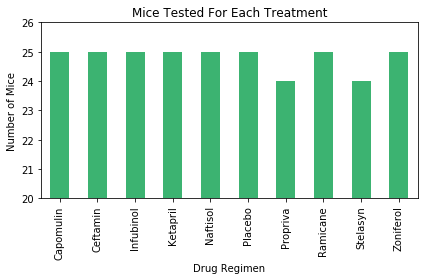

In [17]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas
ylims=[20, max(clean_mice_df.groupby("Drug_Regimen")["Mouse_ID"].nunique())+1]

bar1=clean_mice_df.groupby("Drug_Regimen")["Mouse_ID"].nunique().plot(kind='bar', facecolor="mediumseagreen", rot=90,title="Mice Tested For Each Treatment",ylim=ylims)


# Set labels
bar1.set_xlabel("Drug Regimen")
bar1.set_ylabel("Number of Mice")

plt.tight_layout()

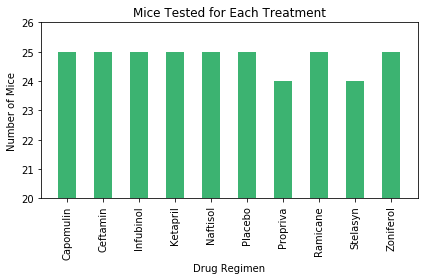

In [18]:
## Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

bar2 = plt.bar(Num_mice_by_drug['Drug_Regimen'],Num_mice_by_drug['Mouse_ID'],color='mediumseagreen',width=.5)
plt.xticks(rotation="vertical");
plt.ylim(20, max(Num_mice_by_drug["Mouse_ID"])+1)

# Set title and labels
plt.title("Mice Tested for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()

plt.show()

In [19]:
clean_mice_df.groupby("Sex")["Mouse_ID"].nunique()

Sex
Female    123
Male      125
Name: Mouse_ID, dtype: int64

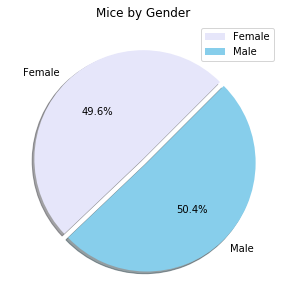

In [22]:
pie1=clean_mice_df.groupby("Sex")["Mouse_ID"].nunique().plot(kind='pie',title="Mice by Gender",shadow = True, startangle = 45,figsize=(5,5), explode=(0, 0.05), autopct='%1.1f%%',colors=["lavender","skyblue"])
pie1.set_ylabel('')
labels=["Female","Male"]
plt.legend(labels=labels,loc="best")
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.show()

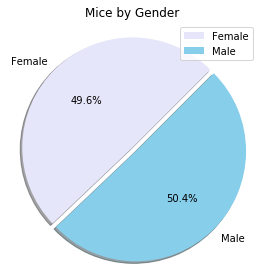

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df=pd.DataFrame(clean_mice_df.groupby("Sex")["Mouse_ID"].nunique())
gender_df=pd.DataFrame(gender_df.reset_index())
gender_df
labels=gender_df['Sex']
pie2=plt.pie(gender_df['Mouse_ID'],labels=gender_df['Sex'],colors=["lavender","skyblue"],shadow=True, explode=(0, 0.05), startangle=45,autopct="%1.1f%%",radius=1.1)
plt.legend(labels=labels,loc="best")
plt.title("Mice by Gender")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_time_df=pd.DataFrame(clean_mice_df.groupby("Mouse_ID")["Timepoint"].max())
max_time_df.head()


,Timepoint
Mouse_ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [27]:

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumour_vol_df= pd.merge(max_time_df, clean_mice_df, on=["Mouse_ID","Timepoint"], how='inner')
final_tumour_vol_df.head()

,Mouse_ID,Timepoint,Drug_Regimen,Sex,Age_months,Weight_g,Tumor_Volume_mm3,Metastatic_Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [29]:

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_Capomulin=[]
tumor_vol_Ramicane=[]
tumor_vol_Infubinol=[]
tumor_vol_Ceftamin=[]

In [30]:
  # Locate the rows which contain mice on each drug and get the tumor volumes
    
for row in final_tumour_vol_df.itertuples():
        if row.Drug_Regimen=="Capomulin":                               
            tumor_vol_Capomulin.append(row.Tumor_Volume_mm3)
        elif row.Drug_Regimen=="Ramicane":                               
            tumor_vol_Ramicane.append(row.Tumor_Volume_mm3)
        elif row.Drug_Regimen=="Infubinol":                               
            tumor_vol_Infubinol.append(row.Tumor_Volume_mm3)
        elif row.Drug_Regimen=="Ceftamin":                               
            tumor_vol_Ceftamin.append(row.Tumor_Volume_mm3)                                   

print("Capumolin tumor volumes: ")
print(tumor_vol_Capomulin)
print("Ramicane tumor volumes: ")
print(tumor_vol_Ramicane)
print("Infubinol tumor volumes: ")
print(tumor_vol_Infubinol)
print("Ceftamin tumor volumes: ")
print(tumor_vol_Ceftamin)
    

Capumolin tumor volumes: 
[38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.125164399999996, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.896238399999998]
Ramicane tumor volumes: 
[38.407618299999996, 43.04754260000001, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]
Infubinol tumor volumes: 
[67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.321345799999996, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.2

In [31]:
#Put lists into dataframe to use quantile
tumor_vol_Capomulin_df=pd.DataFrame()
tumor_vol_Capomulin_df["Cap_Tumor_Vol_mm3"]=tumor_vol_Capomulin

tumor_vol_Ramicane_df=pd.DataFrame()
tumor_vol_Ramicane_df["Ram_Tumor_Vol_mm3"]=tumor_vol_Ramicane

tumor_vol_Infubinol_df=pd.DataFrame()
tumor_vol_Infubinol_df["Inf_Tumor_Vol_mm3"]=tumor_vol_Infubinol

tumor_vol_Ceftamin_df=pd.DataFrame()
tumor_vol_Ceftamin_df["Cef_Tumor_Vol_mm3"]=tumor_vol_Ceftamin


## Capomulin

In [32]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol_Capomulin_df["Cap_Tumor_Vol_mm3"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
mean = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"lower bound= {lower_bound}")
print(f"upper bound= {upper_bound}")
print(f"IQR= {iqr}")
print(mean)

lower bound= 20.70456164999999
upper bound= 51.83201549
IQR= 7.781863460000004
38.125164399999996


In [33]:
# Determine outliers using upper and lower bounds


lower_cap_outliers=tumor_vol_Capomulin_df[tumor_vol_Capomulin_df["Cap_Tumor_Vol_mm3"] < lower_bound]
upper_cap_outliers=tumor_vol_Capomulin_df[tumor_vol_Capomulin_df["Cap_Tumor_Vol_mm3"] > upper_bound]
print(upper_cap_outliers)
print("-------")
print(lower_cap_outliers)

Empty DataFrame
Columns: [Cap_Tumor_Vol_mm3]
Index: []
-------
Empty DataFrame
Columns: [Cap_Tumor_Vol_mm3]
Index: []


# Ramicane

In [34]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol_Ramicane_df["Ram_Tumor_Vol_mm3"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
mean = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"lower bound= {lower_bound}")
print(f"upper bound= {upper_bound}")
print(f"IQR= {iqr}")
print(mean)

lower bound= 17.912664470000003
upper bound= 54.30681135
IQR= 9.098536719999998
36.56165229


In [35]:
#outliers
lower_ram_outliers=tumor_vol_Ramicane_df[tumor_vol_Ramicane_df["Ram_Tumor_Vol_mm3"] < lower_bound]
upper_ram_outliers=tumor_vol_Ramicane_df[tumor_vol_Ramicane_df["Ram_Tumor_Vol_mm3"] > upper_bound]
print(upper_ram_outliers)
print("-------")
print(lower_ram_outliers)

Empty DataFrame
Columns: [Ram_Tumor_Vol_mm3]
Index: []
-------
Empty DataFrame
Columns: [Ram_Tumor_Vol_mm3]
Index: []


# Infubinol

In [36]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol_Infubinol_df["Inf_Tumor_Vol_mm3"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
mean = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"lower bound= {lower_bound}")
print(f"upper bound= {upper_bound}")
print(f"IQR= {iqr}")
print(mean)

lower bound= 36.83290494999999
upper bound= 82.74144559000001
IQR= 11.477135160000003
60.16518046


In [37]:
#outliers
lower_inf_outliers=tumor_vol_Infubinol_df[tumor_vol_Infubinol_df["Inf_Tumor_Vol_mm3"] < lower_bound]
upper_inf_outliers=tumor_vol_Infubinol_df[tumor_vol_Infubinol_df["Inf_Tumor_Vol_mm3"] > upper_bound]
print(upper_inf_outliers)
print("-------")
print(lower_inf_outliers)

Empty DataFrame
Columns: [Inf_Tumor_Vol_mm3]
Index: []
-------
   Inf_Tumor_Vol_mm3
5          36.321346


In [38]:
#Remove outliers
tumor_vol_Infubinol_df2=tumor_vol_Infubinol_df[tumor_vol_Infubinol_df["Inf_Tumor_Vol_mm3"] > lower_bound]

# Ceftamin

In [39]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol_Ceftamin_df["Cef_Tumor_Vol_mm3"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
mean = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"lower bound= {lower_bound}")
print(f"upper bound= {upper_bound}")
print(f"IQR= {iqr}")
print(mean)

lower bound= 25.355449580000002
upper bound= 87.66645829999999
IQR= 15.577752179999997
59.85195552


In [40]:
#outliers
lower_inf_outliers=tumor_vol_Ceftamin_df[tumor_vol_Ceftamin_df["Cef_Tumor_Vol_mm3"] < lower_bound]
upper_inf_outliers=tumor_vol_Ceftamin_df[tumor_vol_Ceftamin_df["Cef_Tumor_Vol_mm3"] > upper_bound]
print(upper_inf_outliers)
print("-------")
print(lower_inf_outliers)

Empty DataFrame
Columns: [Cef_Tumor_Vol_mm3]
Index: []
-------
Empty DataFrame
Columns: [Cef_Tumor_Vol_mm3]
Index: []


In [41]:
# Creating an empty dictionary 
DrugDict = {} 
  

DrugDict["Capomulin"]=tumor_vol_Capomulin
DrugDict["Ramicane"]=tumor_vol_Ramicane
DrugDict["Infubinol"]=tumor_vol_Infubinol
DrugDict["Ceftamin"]=tumor_vol_Ceftamin
  
#print(DrugDict) 

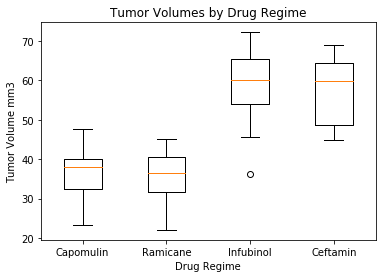

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(DrugDict.values())
ax.set_xticklabels(DrugDict.keys())
plt.title("Tumor Volumes by Drug Regime", loc="center")
ax.set_xlabel("Drug Regime")
ax.set_ylabel("Tumor Volume mm3")
plt.show()

## Line and Scatter Plots

In [47]:
clean_mice_df.columns=clean_mice_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
clean_mice_df.head()


,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [52]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#just capomulin data df to choose mouse
capo_df=clean_mice_df.loc[clean_mice_df['drug_regimen'] == "Capomulin",['mouse_id','drug_regimen','timepoint', "weight_g",'tumor_volume_mm3']]
capo_df.head()


,mouse_id,drug_regimen,timepoint,weight_g,tumor_volume_mm3
10,s185,Capomulin,0,17,45.000000
11,s185,Capomulin,5,17,43.878496
12,s185,Capomulin,10,17,37.614948
13,s185,Capomulin,15,17,38.177232
14,s185,Capomulin,20,17,36.866876


In [ ]:
#just mouse x401 data df 
x401_df=capo_df.loc[capo_df["Mouse_ID"]=='x401',['Timepoint','Tumor_Volume_mm3']]
x401_df

In [ ]:
#plot data
time=x401_df["Timepoint"]
volume=x401_df['Tumor_Volume_mm3']
x401 = plt.plot(time, volume, color="red", label="Mouse x401 Time vs Tumor Volume")

# Add labels to X and Y axes :: Add title
plt.title("Mouse x401 Time vs Tumor Volume")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume mm3")
plt.xlim(-2,50)
plt.ylim(25,50)

In [62]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight=capo_df.groupby("mouse_id").mean()["weight_g"]
ave_tumor_vol=capo_df.groupby("mouse_id").mean()["tumor_volume_mm3"]



mouse_id
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: tumor_volume_mm3, dtype: float64

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
